# Exploring Flight Patterns: Price, Time, and City-wise Trends

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
data = pd.read_csv(r"C:\Users\Vedant\Downloads\airlines_flights_data.csv")

In [14]:
data.head(10)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [15]:
data.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [16]:
data.isnull().sum().sum()

0

In [17]:
# REMOVING THE "index" COLUMN AS IT IS AN REDUNTANT
data = data.drop("index", axis=1)

In [18]:
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [21]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [22]:
# FINDING FLIGHTS WITH THE MAX DURATION
data[data["duration"] == 49.830000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538


In [23]:
# FINDING FLIGHTS WITH THE MIN DURATION
data[data["duration"] == 0.830000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
115869,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,6,3498
115943,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,7,3498
116010,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,8,3498
116081,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,9,3498
116163,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,10,3498
116236,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,11,3498
116322,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,12,3498
116411,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,13,3498
116496,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,14,3498
116656,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,16,1924


In [25]:
# FINDING FLIGHTS WITH THE MAX PRICE
data[data["price"] == 123071.000000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
261377,Vistara,UK-772,Kolkata,Morning,one,Night,Delhi,Business,13.5,3,123071


In [26]:
# FINDING FLIGHTS WITH THE MIN PRICE
data[data["price"] == 1105.000000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
203807,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,16,1105
203808,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,16,1105
203908,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,17,1105
203909,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,17,1105
204003,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,18,1105
...,...,...,...,...,...,...,...,...,...,...,...
206601,Indigo,6E-7261,Chennai,Morning,one,Evening,Hyderabad,Economy,7.92,49,1105
206602,Indigo,6E-611,Chennai,Evening,one,Late_Night,Hyderabad,Economy,8.25,49,1105
206603,Indigo,6E-581,Chennai,Morning,one,Evening,Hyderabad,Economy,9.17,49,1105
206604,Indigo,6E-7127,Chennai,Afternoon,one,Night,Hyderabad,Economy,9.50,49,1105


# FLIGHTS COUNT PER CITY

In [37]:
data_city = data.groupby("source_city").size()
# print(data.groupby("source_city").size()) # This will give you the number of rows (flights) for each city.
# print(data["source_city"].value_counts()) # This directly counts how many times each city appears in the "source_city" column.

data_city_counts = data.groupby("source_city").size().reset_index(name="flight_count")
print(data_city_counts) # To get dataframe
# for x, y in data_city:
#     print(x)
#     print(y)

  source_city  flight_count
0   Bangalore         52061
1     Chennai         38700
2       Delhi         61343
3   Hyderabad         40806
4     Kolkata         46347
5      Mumbai         60896


Conclusion:

    1.Delhi (61,343 flights) and Mumbai (60,896 flights) are the top source cities, highlighting their role as major aviation hubs.

    2.Bangalore (52,061 flights) and Kolkata (46,347 flights) follow as strong contributors.

    3.Hyderabad (40,806) and Chennai (38,700) record relatively fewer flights but still remain significant.

    4.Overall, the distribution shows that Delhi and Mumbai dominate flight departures, reflecting their importance in India’s air traffic network.

# FINDING OUT THE NUMBER OF FLIGHTS PER AIRLINE

In [47]:
print(f"Total unique airlines : {data['airline'].nunique()}") # To get unique value count and unique() to get list of airlines
print()
data_city_counts = data.groupby("airline").size().reset_index(name="flight_count")
print(data_city_counts.sort_values(by="flight_count", ascending=False)) # To get dataframe , can also use "data["airline"].value_counts()" gives from highest to lowest

Total unique airlines : 6

     airline  flight_count
5    Vistara        127859
1  Air_India         80892
3     Indigo         43120
2   GO_FIRST         23173
0    AirAsia         16098
4   SpiceJet          9011


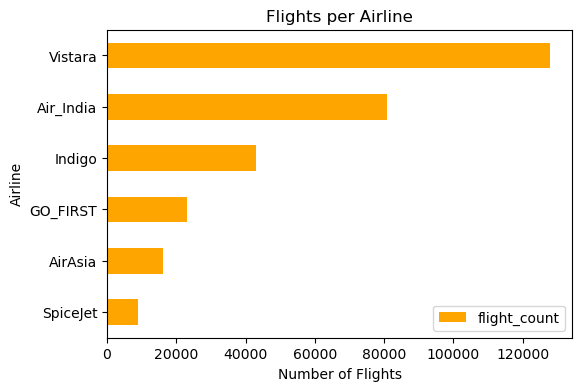

In [52]:
data_city_counts.sort_values(by="flight_count", ascending=True).plot(
    x="airline", y="flight_count", kind="barh", figsize=(6,4), color="orange")
plt.xlabel("Number of Flights")
plt.ylabel("Airline")
plt.title("Flights per Airline")
plt.show()

Conclusion:

    1.From the analysis, we observe that Vistara operates the highest number of flights, while SpiceJet records the lowest.

    2.This shows that flight distribution is not uniform across airlines, with certain carriers dominating the market share represented in the dataset.

# SHOWING THE FLIGHT FREQUENCY AT DIFFERENT ARRIVAL TIME AND DEPARTURE TIME OF FLIGHTS

In [53]:
data['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [54]:
data['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

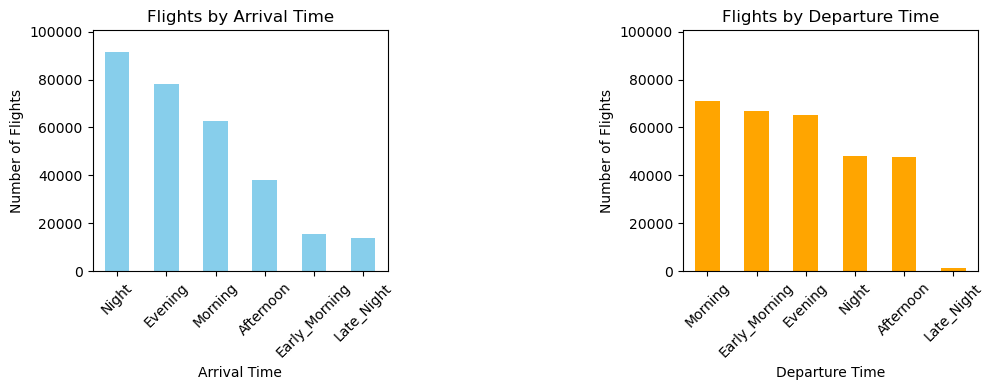

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# # To maintain a similar scale in Y axis
max_flights = max(data['arrival_time'].value_counts().max(),
                  data['departure_time'].value_counts().max())
axes[0].set_ylim(0, max_flights + 9000)
axes[1].set_ylim(0, max_flights + 9000)


# Arrival time bar plot
data['arrival_time'].value_counts().plot(
    kind="bar", color="skyblue", ax=axes[0]
)
axes[0].set_xlabel("Arrival Time")
axes[0].set_ylabel("Number of Flights")
axes[0].set_title("Flights by Arrival Time")
axes[0].tick_params(axis='x', rotation=45)

# Departure time bar plot
data['departure_time'].value_counts().plot(
    kind="bar", color="orange", ax=axes[1]
)
axes[1].set_xlabel("Departure Time")
axes[1].set_ylabel("Number of Flights")
axes[1].set_title("Flights by Departure Time")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(wspace=1)
plt.show()

Conclusion:

    1.Departures peak in the morning and early morning, showing that airlines prefer scheduling flights earlier in the day.

    2.Arrivals are concentrated in the evening and night, aligning with end-of-day travel demand.

    3.Afternoon and late-night slots have fewer flights, indicating they are less preferred operational windows.

    4.The pattern reflects a typical travel cycle: passengers depart in the morning and arrive later in the day.

    5.Airlines’ scheduling choices show a balance between passenger convenience and operational efficiency.

# SHOWING THE SOURCE CITY and DESTINATION CITY OF FLIGHTS

In [70]:
data['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [71]:
data['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

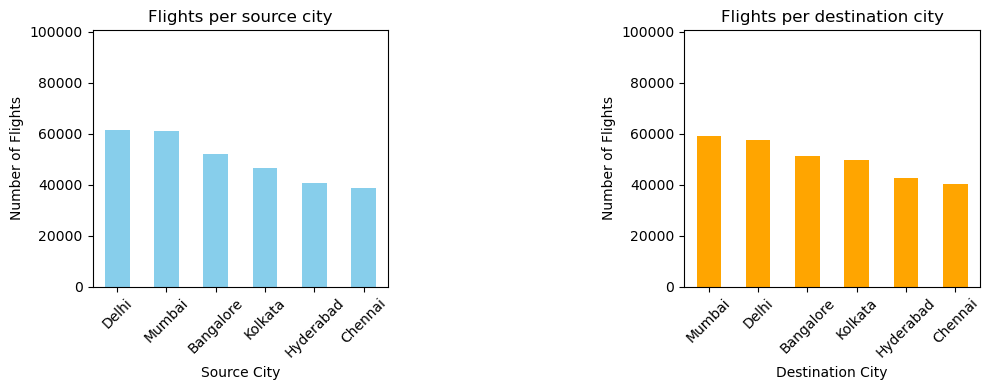

In [74]:
# SHOWING BOTH THE OUTPUTS USING BAR PLOT

fig, axes = plt.subplots(1, 2, figsize=(10,4))

# # To maintain a similar scale in Y axis
max_flights = max(data['arrival_time'].value_counts().max(),
                  data['departure_time'].value_counts().max())
axes[0].set_ylim(0, max_flights + 9000)
axes[1].set_ylim(0, max_flights + 9000)


# Arrival time bar plot
data['source_city'].value_counts().plot(
    kind="bar", color="skyblue", ax=axes[0]
)
axes[0].set_xlabel("Source City")
axes[0].set_ylabel("Number of Flights")
axes[0].set_title("Flights per source city")
axes[0].tick_params(axis='x', rotation=45)

# Departure time bar plot
data['destination_city'].value_counts().plot(
    kind="bar", color="orange", ax=axes[1]
)
axes[1].set_xlabel("Destination City")
axes[1].set_ylabel("Number of Flights")
axes[1].set_title("Flights per destination city")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(wspace=1)
plt.show()

In [75]:
pd.crosstab(data['source_city'], data['destination_city'])

destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
source_city,,,,,,
Bangalore,0,6410,13756,8928,10028,12939
Chennai,6493,0,9783,6103,6983,9338
Delhi,14012,10780,0,9328,11934,15289
Hyderabad,7854,6395,8506,0,7987,10064
Kolkata,9824,6653,10506,7897,0,11467
Mumbai,12885,10130,14809,10470,12602,0


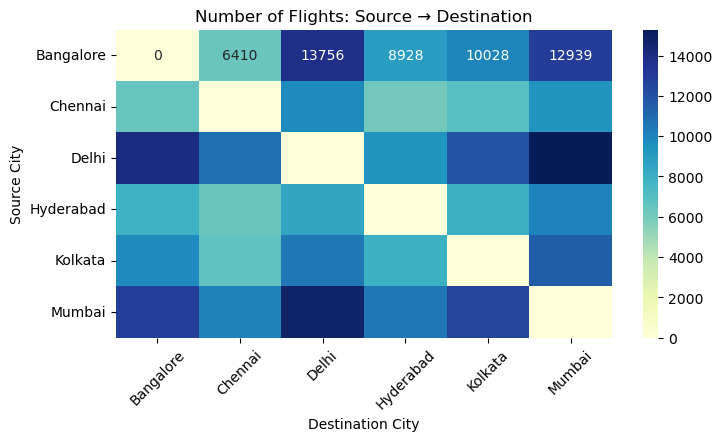

In [86]:
# Create a pivot table / crosstab
flight_matrix = pd.crosstab(data['source_city'], data['destination_city'])

# Plot heatmap
plt.figure(figsize=(8,4))
sns.heatmap(flight_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Number of Flights: Source → Destination")
plt.xlabel("Destination City")
plt.ylabel("Source City")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# TO IDENTIFY IF THE PRICES VARY WITH AIRLINES

In [87]:
# do not take directly the value take mean for better analysis
data.groupby("airline")['price'].mean()

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

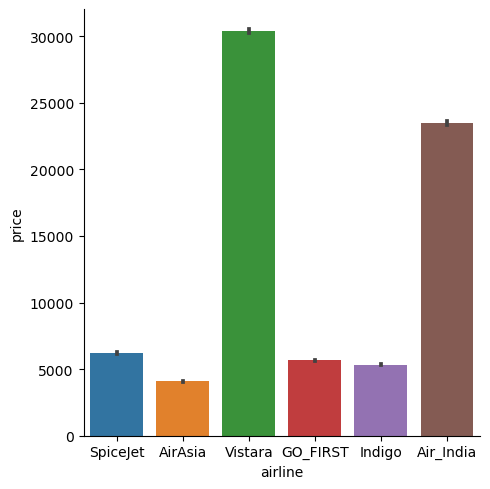

In [91]:
# Showing the Categorical plot  for Mean ticket price of the airline
sns.catplot(x='airline',y='price',kind='bar',data=data)
plt.show()

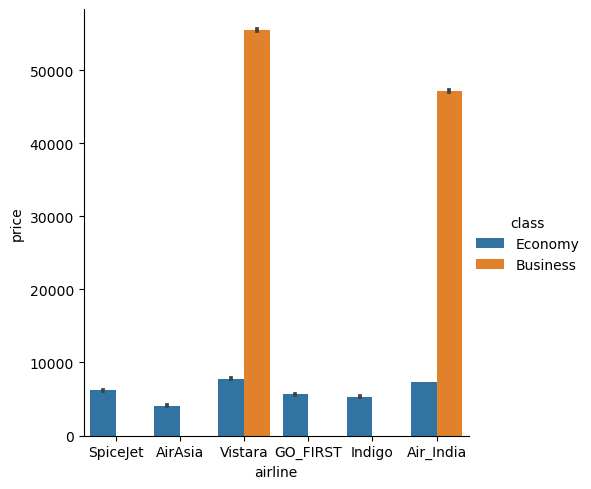

In [92]:
sns.catplot(x='airline',y='price',kind='bar',data=data,hue='class')
plt.show()

Conclusion:

    1.Vistara has the highest average Economy class fare, exceeding ₹50,000, followed closely by Air India at around ₹48,000.


    2.On average, Vistara’s mean ticket price is ₹30,396, while Air India’s mean is ₹23,507, significantly higher than the other airlines.


    3.Most other airlines have a mean ticket price between ₹4,000–₹6,000, indicating they cater to a more budget-conscious segment.


    4.This shows a clear pricing gap, suggesting that Vistara and Air India are positioned as premium carriers, whereas other airlines focus on affordable travel.


    5.The plot highlights both class-wise and airline-wise variations, showing that pricing strategy strongly differentiates premium and budget airlines in the market.

# TO IDENTIFY IF THE PRICE VARIES WITH THE DEPARTURE AND ARRIVAL TIME

In [93]:
data.groupby("departure_time")['price'].mean()

departure_time
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Late_Night        9295.299387
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64

In [94]:
data.groupby("arrival_time")['price'].mean()

arrival_time
Afternoon        18494.598993
Early_Morning    14993.139521
Evening          23044.371615
Late_Night       11284.906078
Morning          22231.076098
Night            21586.758341
Name: price, dtype: float64

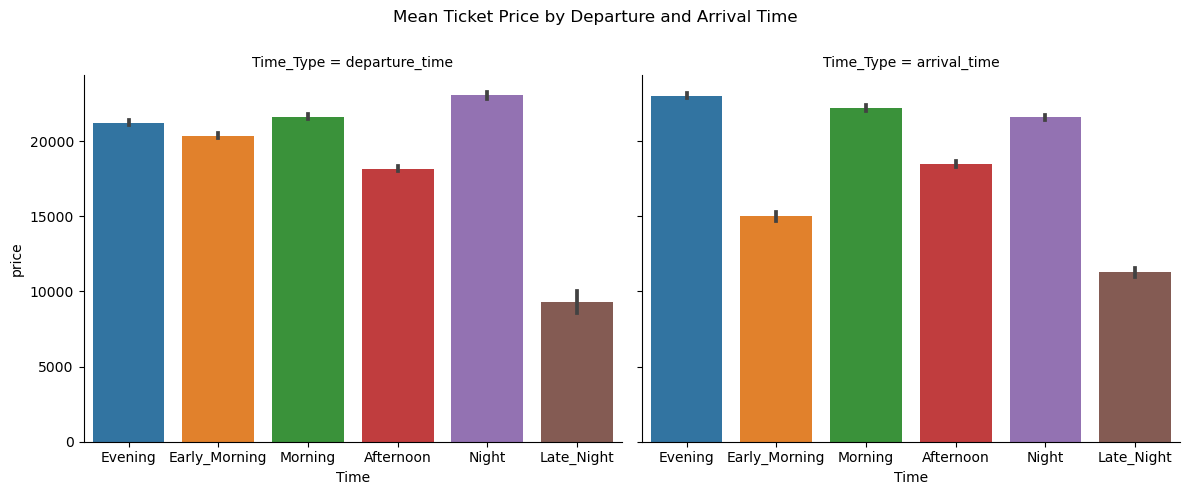

In [101]:
df_plot = data[['departure_time','arrival_time','price','class']]

df_long = df_plot.melt(id_vars=['price','class'], 
                       value_vars=['departure_time','arrival_time'], 
                       var_name='Time_Type', 
                       value_name='Time')
# print(df_long)

sns.catplot(
    x='Time', 
    y='price', 
    # hue='class', 
    col='Time_Type',
    kind='bar', 
    data=df_long,
    height=5, 
    aspect=1.2
)

plt.subplots_adjust(top=0.85)
plt.suptitle("Mean Ticket Price by Departure and Arrival Time")
plt.show()


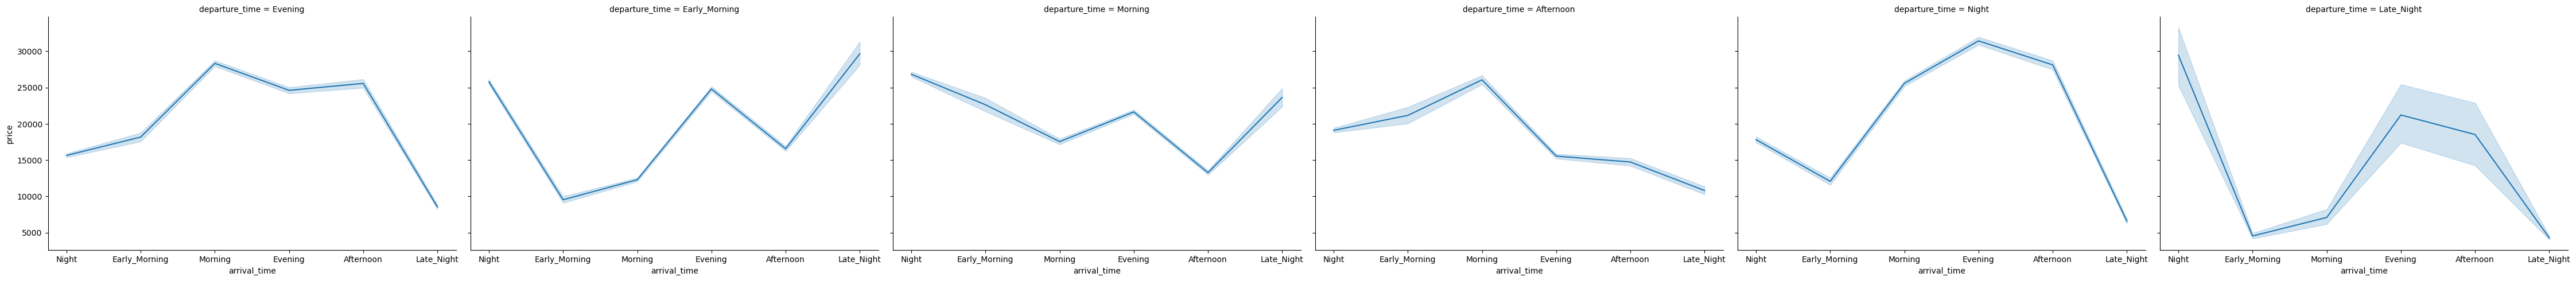

In [108]:
sns.relplot(
    x='arrival_time', 
    y='price', 
    data=data,
    col = 'departure_time',
    kind = 'line',
    height=5,
    aspect=1.5,
)
plt.show()

Conclusion:

    1.Night, Morning, and Evening departures have the highest average ticket prices.

    2.Late_Night departures are significantly cheaper.

    3.Evening and Morning arrivals have the highest average prices.

    4.Late_Night and Early_Morning arrivals are much cheaper.

    5.Afternoon and Night slots have moderate prices for both departures and arrivals.

    6.Ticket prices increase during peak/preferred times and decrease during less popular/off-peak times.

    7.This indicates a time-based pricing strategy based on demand and convenience.

# TO ANALYSE HOW THE PRICE AFFECTS WHEN THE TICKETS ARE BROUGHT 1 OR 2 DAYS PRIOR TO THE DEAPRTURE

In [109]:
data['days_left'].nunique()

49

In [110]:
data['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

In [112]:
data.groupby('days_left')['price'].mean()

days_left
1     21591.867151
2     30211.299801
3     28976.083569
4     25730.905653
5     26679.773368
6     24856.493902
7     25588.367351
8     24895.883995
9     25726.246072
10    25572.819134
11    22990.656070
12    22505.803322
13    22498.885384
14    22678.002363
15    21952.540852
16    20503.546237
17    20386.353949
18    19987.445168
19    19507.677375
20    19699.983390
21    19430.494058
22    19590.667385
23    19840.913451
24    19803.908896
25    19571.641791
26    19238.290278
27    19950.866195
28    19534.986047
29    19744.653119
30    19567.580834
31    19392.706612
32    19258.135308
33    19306.271739
34    19562.008266
35    19255.652996
36    19517.688444
37    19506.306516
38    19734.912316
39    19262.095556
40    19144.972439
41    19347.440460
42    19154.261659
43    19340.528894
44    19049.080174
45    19199.876307
46    19305.351623
47    18553.272038
48    18998.126851
49    18992.971888
Name: price, dtype: float64

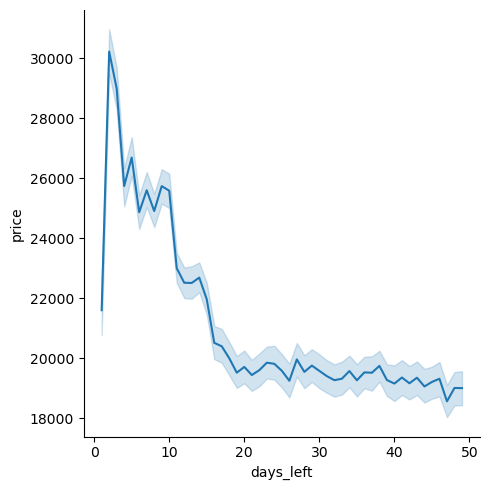

In [114]:
sns.relplot(x='days_left',y='price',data=data,kind='line')
plt.show()

Conclusion:

    1.Ticket prices rise sharply when the departure date is near (less than 10 days), averaging ₹25k+.

    2.When bookings are made well in advance (20+ days before departure), prices are much lower, around ₹18k–20k.

    3.This indicates a strong time-based pricing strategy where last-minute bookings are significantly more expensive.

    4.Passengers can save considerably by booking earlier, while airlines maximize revenue from urgent, last-minute travelers.